<a href="https://colab.research.google.com/github/tohnperfect/DPDM/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [3]:
X.shape

(300, 2)

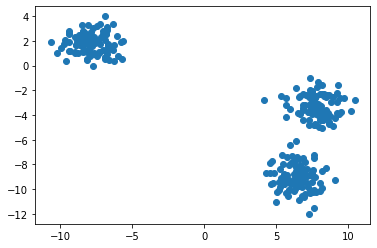

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

## Import

In [5]:
from sklearn.cluster import KMeans

## Define

In [11]:
KMclust = KMeans(n_clusters=3)

## Train

In [12]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Predict

In [13]:
label = KMclust.predict(X)

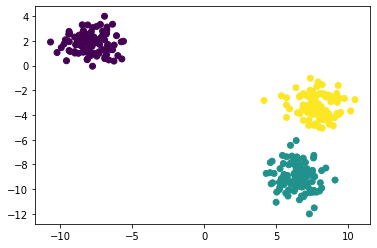

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=label)

# Color quantization (application of kmean)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive'

Mounted at /content/drive


In [16]:
import cv2
import os

In [17]:
img = cv2.imread(os.path.join(path,'87cc3e259371aff47ea9bae80536c02b.jpg'))

In [19]:
img.shape

(546, 431, 3)

In [18]:
img

array([[[  0,  26,  31],
        [  0,  29,  34],
        [ 12,  30,  41],
        ...,
        [ 32,  45,  53],
        [ 35,  48,  56],
        [ 32,  44,  54]],

       [[  2,  32,  37],
        [  7,  33,  39],
        [ 17,  32,  41],
        ...,
        [ 31,  44,  52],
        [ 35,  48,  56],
        [ 36,  48,  58]],

       [[  2,  35,  38],
        [  8,  32,  38],
        [ 24,  28,  39],
        ...,
        [ 29,  42,  50],
        [ 29,  42,  50],
        [ 29,  41,  51]],

       ...,

       [[ 80,  87, 112],
        [ 79,  86, 111],
        [ 79,  86, 111],
        ...,
        [157, 148, 174],
        [154, 145, 171],
        [153, 144, 171]],

       [[ 89,  95, 118],
        [ 81,  87, 110],
        [ 94, 100, 123],
        ...,
        [157, 154, 176],
        [149, 146, 168],
        [147, 143, 168]],

       [[ 94,  99, 120],
        [ 86,  91, 112],
        [100, 104, 128],
        ...,
        [156, 154, 176],
        [148, 146, 168],
        [146, 144, 166]]

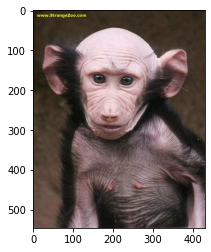

In [20]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

## count unique colors

In [48]:
import numpy as np

In [49]:
np.unique(RGB_img,axis=2)

array([[[  0,  26,  31],
        [  0,  29,  34],
        [ 12,  30,  41],
        ...,
        [ 32,  45,  53],
        [ 35,  48,  56],
        [ 32,  44,  54]],

       [[  2,  32,  37],
        [  7,  33,  39],
        [ 17,  32,  41],
        ...,
        [ 31,  44,  52],
        [ 35,  48,  56],
        [ 36,  48,  58]],

       [[  2,  35,  38],
        [  8,  32,  38],
        [ 24,  28,  39],
        ...,
        [ 29,  42,  50],
        [ 29,  42,  50],
        [ 29,  41,  51]],

       ...,

       [[ 80,  87, 112],
        [ 79,  86, 111],
        [ 79,  86, 111],
        ...,
        [157, 148, 174],
        [154, 145, 171],
        [153, 144, 171]],

       [[ 89,  95, 118],
        [ 81,  87, 110],
        [ 94, 100, 123],
        ...,
        [157, 154, 176],
        [149, 146, 168],
        [147, 143, 168]],

       [[ 94,  99, 120],
        [ 86,  91, 112],
        [100, 104, 128],
        ...,
        [156, 154, 176],
        [148, 146, 168],
        [146, 144, 166]]

## Use K-mean to reduce color from 256 colors to 8 colors

In [35]:
#Define
myQuantize = KMeans(n_clusters=16)

In [36]:
img_row = np.reshape(RGB_img,(546*431,3))
img_row

array([[ 31,  26,   0],
       [ 34,  29,   0],
       [ 41,  30,  12],
       ...,
       [176, 154, 156],
       [168, 146, 148],
       [166, 144, 146]], dtype=uint8)

In [37]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
#Predict
res = myQuantize.predict(img_row)

In [39]:
res

array([11, 11,  0, ...,  7,  7,  7], dtype=int32)

## Get cluster centers

In [40]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 36.70069759,  32.33784816,  27.09623708],
       [212.51067205, 182.92111335, 187.42760312],
       [119.71236461,  94.91655157,  95.47532165],
       [104.2596164 ,  81.55854615,  77.9885027 ],
       [ 63.57944272,  50.79564161,  40.97486844],
       [153.91033362, 125.33027435, 128.74868559],
       [241.77880092, 219.98128315, 227.5923331 ],
       [174.57967776, 142.10702105, 147.06668235],
       [ 88.36902594,  69.56298361,  64.26467911],
       [136.3745014 , 109.67343773, 111.56972965],
       [ 53.81203927,  43.40968936,  32.31440528],
       [ 20.70132051,  20.42244874,  16.81628634],
       [219.50595238, 216.6547619 ,  81.48214286],
       [229.86255193, 204.16676558, 209.52083086],
       [194.46546884, 161.18992139, 166.20395845],
       [ 74.50146443,  59.56134817,  51.85526968]])

In [41]:
Clus_cen.shape

(16, 3)

## Map color back to the image

In [42]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [43]:
new_img_ = new_img/255

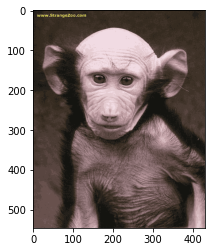

In [44]:
plt.imshow(new_img_)